## Insurance Premium Prediction Project

### Lifecycle of a Machine learning Project

- Understanding the Problem Statement

- Data Collection

- Data Checks to perform

- Exploratory Data Analysis

- Data Pre-Processing

- Model Training

- Choose best model

### 1) Problem Statement

- The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.

### 2) Data Collection

- Data Source - https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction?select=insurance.csv

- The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns).

### 2.1 Import Data and Required Packages

### Importing Pandas, NumPy, Matplotlib, Seaborn, and Warnings Libraries

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/My Drive/Colab Notebooks/Insurance-Premium-Prediction

/content/drive/My Drive/Colab Notebooks/Insurance-Premium-Prediction


### Import the CSV Data as Pandas DataFrame

In [8]:
df = pd.read_csv("./insurance.csv")


### Show Top 5 Records

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Shape of the dataset

In [10]:
df.shape

(1338, 7)

### 2.2 Dataset information

-  The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.
- age: age of an individual
- bmi: Body Mass Index of an individual
- children: Number of chidlren an individual has
- sex: Gender of an individual -> (Male/Female)
- smoker: Whether an individual smokes or not -> (yes/no)
- region: Region where an individual lives ---> (northeast/ northwest/ southeast/ southwest

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set.
- Check various categories present in the different categorical columns.

### 3.1 Check Missing values

In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


#### There are no missing values in the data set

### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

#### Duplicate rows in the dataset have been removed

### 3.3 Check data types

In [15]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [16]:
df.nunique()

,0
age,47
sex,2
bmi,275
children,6
smoker,2
region,4
expenses,1337


### 3.5 Check statistics of data set

In [17]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


#### Insight:

- From the above description of numerical data: means, standard deviations, minimum, Q1, Q2, Q3, and maximum of 'age' and 'bmi' columns are closer to each other as compared to 'children' and 'expenses' column.
- Age of all individuals is atleast 18, i.e., all individuals are adults.
- No individual has more than 5 and children.
- No indivudual is older than 64 years of age.

### 3.6 Exploring Data

In [18]:
print("Categories in 'sex' variable:    ", end = " ")
print(df['sex'].unique())

print("Categories in 'smoker' variable:    ", end = " ")
print(df['smoker'].unique())

print("Categories in 'region' variable:    ", end = " ")
print(df['region'].unique())

Categories in 'sex' variable:     ['female' 'male']
Categories in 'smoker' variable:     ['yes' 'no']
Categories in 'region' variable:     ['southwest' 'southeast' 'northwest' 'northeast']


In [19]:
# define numerical & categorical columns.
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


### 4. Exploring Data (Visualization)

#### 4.1.Histograms (with KDE) of the numerical columns.

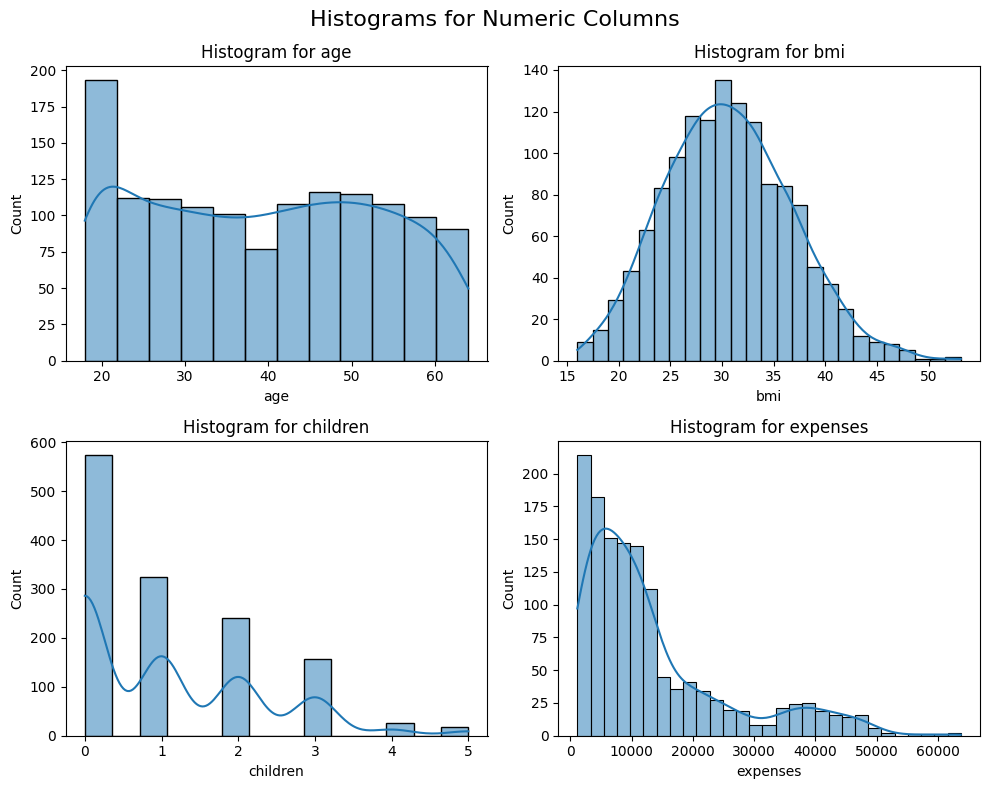

In [20]:
# Probability Distributions of the numeric columns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms for each column
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(f'Histogram for {col}')

# Add overall title
fig.suptitle('Histograms for Numeric Columns', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:
- BMI column is normally distributed.
- Expenses column is right skewed i.e., most of the individuals have low budget.
- Most of the individuals have no children

#### 4.2 CountPlots of the Categorical Columns.

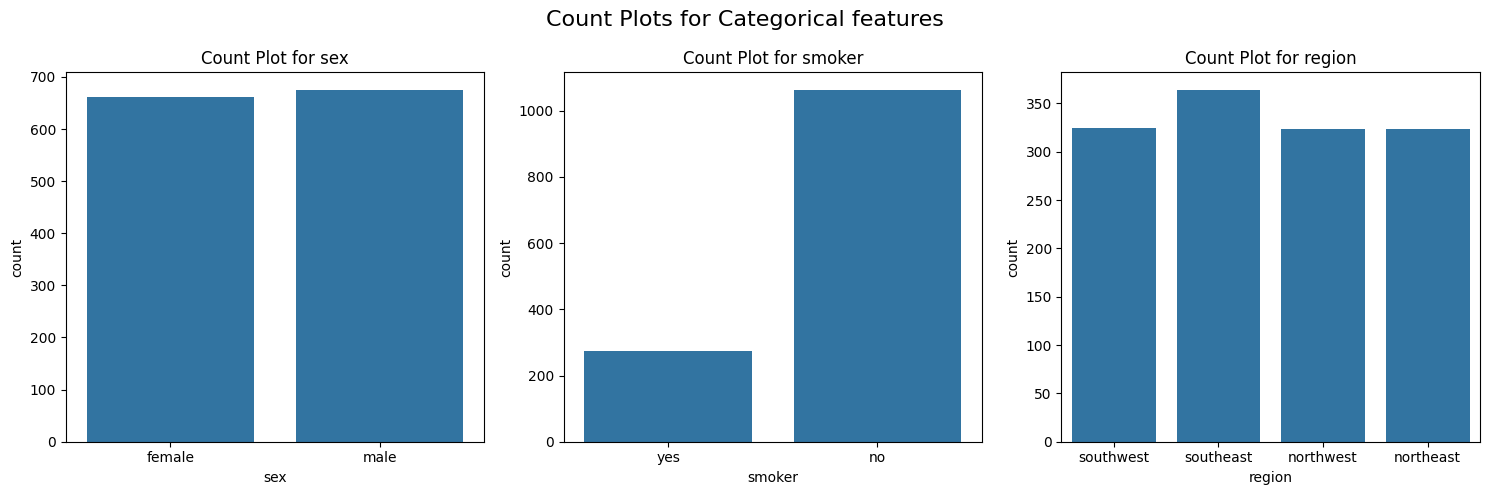

In [21]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot count plots for each column
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')

# Add overall title
fig.suptitle('Count Plots for Categorical features', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:
- Count of male indivudals is almost the same as count of female individuals.
- Most of the individuals do not smoke

### 4.3.  Histogram (with KDE) plot of "Expenses" column with hue as "sex" column

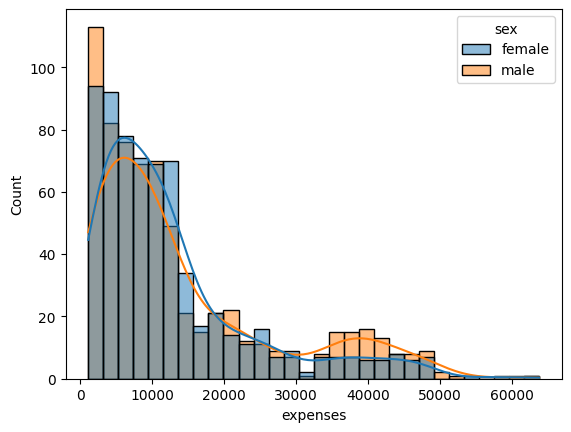

In [22]:
plt.figure()
sns.histplot(data=df,x='expenses',bins=30,kde=True,hue = 'sex')

plt.show()

#### Insights:
- Male individuals have a greater insurance premium cost.

### 4.4 Histogram (with KDE) plot of "Expenses" column with hue as "smoker" column

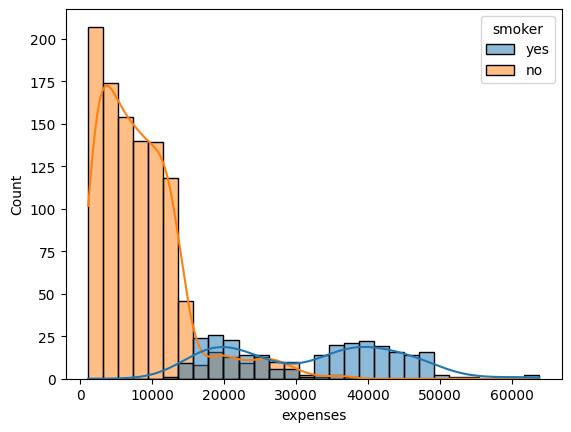

In [23]:
plt.figure()
sns.histplot(data=df,x='expenses',bins=30,kde=True,hue = 'smoker')

plt.show()

#### Insights:
- Smokers are charged a much higher insurance premium expense as compared to non-smokers.

### 4.5. Plotting Box Plot for each numerical feature

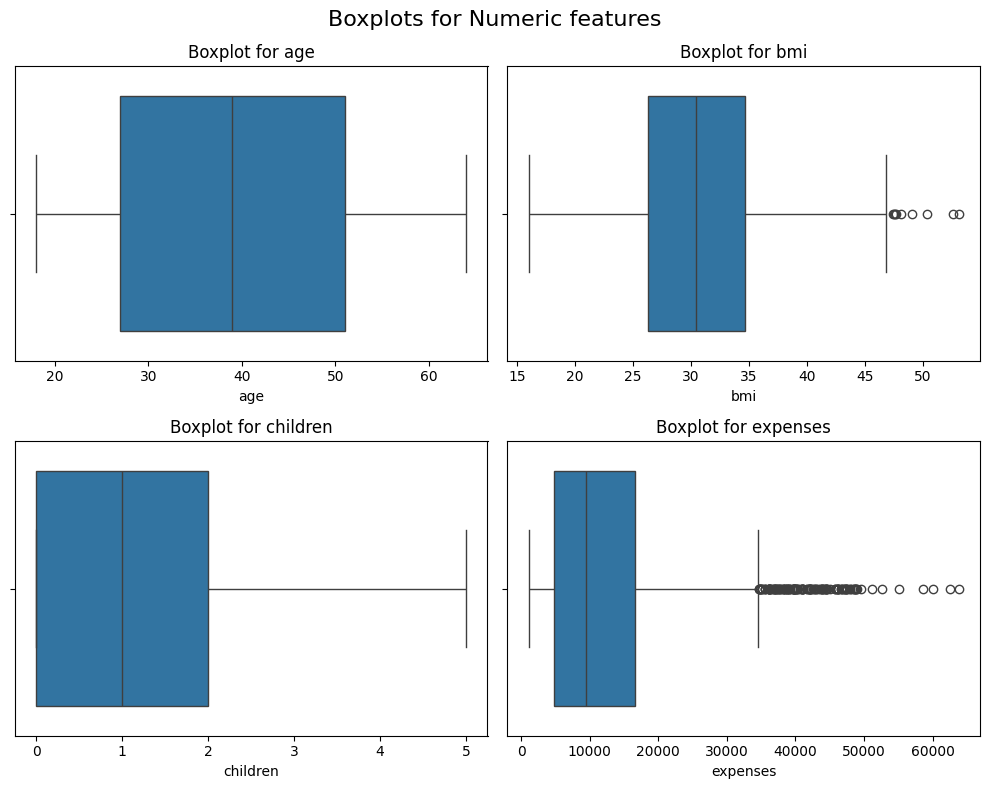

In [24]:
# Checking for outliers

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot boxplots for each column
for i, col in enumerate(numeric_features):
    sns.boxplot(x=df[col], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot for {col}')

# Add overall title
fig.suptitle('Boxplots for Numeric features', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:
- "Children" and "age" columns have no outliers.
- "Expenses" column has huge number of outliers. However, since it is the target column,we leave it as it is.